# Networkx

Es una libreria para el manejo de grafos en python. Tiene muchos algoritmos típicos de grafos implementados. Toda la información está disponible en la [documentación](https://networkx.org/documentation/stable/reference/index.html)

# Crear grafos
Networkx es muy flexible a la hora de crear grafos y permite crear tanto grafos dirigidos como no dirigidos.

* [`Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html): clase que representa un grafo **no dirigido**
* [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html): clase que representa un grafo **dirigido**

Además, permite incluir atributos tanto en los nodos como en las aristas

## Crear un grafo usando los métodos de la clase 

Usaremos el constructor y los métodos [`add_node`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_node.html#networkx.Graph.add_node) y [`add_edge`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html#networkx.Graph.add_edge). También existen `remove_node` y `remove_edge` para eliminar nodos y aristas. Por último, podemo usar `has_edge` y `has_node` para comprobar si está un nodo presente o no.

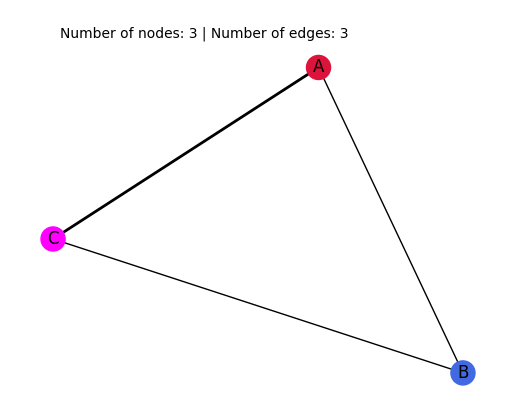

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node('A', color='crimson')
G.add_node('B', color='royalBlue')
G.add_node('C', color='magenta')

G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=2)
G.add_edge('C', 'B', weight=1)

f, ax = plt.subplots()

text = f"""
Number of nodes: {G.number_of_nodes()} | Number of edges: {G.number_of_edges()}
"""

nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)

ax.set_axis_off()
ax.text(0.1, 0.95, text, transform=ax.transAxes)

plt.show()

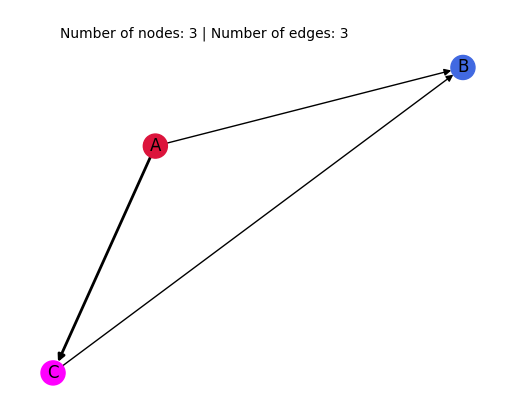

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_node('A', color='crimson')
G.add_node('B', color='royalBlue')
G.add_node('C', color='magenta')

G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=2)
G.add_edge('C', 'B', weight=1)

f, ax = plt.subplots()

text = f"""
Number of nodes: {G.number_of_nodes()} | Number of edges: {G.number_of_edges()}
"""

nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)

ax.set_axis_off()
ax.text(0.1, 0.95, text, transform=ax.transAxes)

plt.show()

## Crear grafo desde una lista de aristas

Usaremos el método [`from_edgelist`](https://networkx.org/documentation/stable/reference/generated/networkx.convert.from_edgelist.html#networkx.convert.from_edgelist) para crear el grafo. Luego pondremos los atributos usando [`set_node_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html) y [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html).

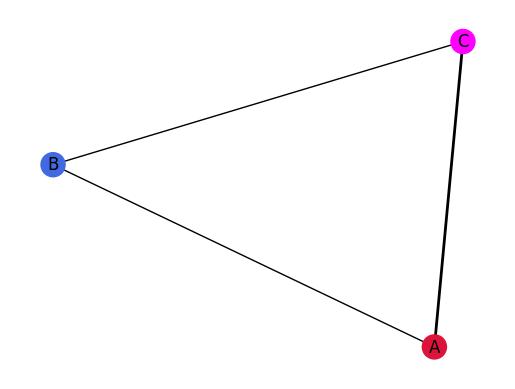

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_edgelist([('A', 'B'), ('A', 'C'), ('C', 'B')], create_using=nx.Graph)
nx.set_node_attributes(G, {'A': "crimson", 'B': "royalBlue", 'C': "magenta"}, 'color')
nx.set_edge_attributes(G, {('A','B'): 1, ('A','C'): 2, ('C','B'): 1}, 'weight')

f, ax = plt.subplots()
nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

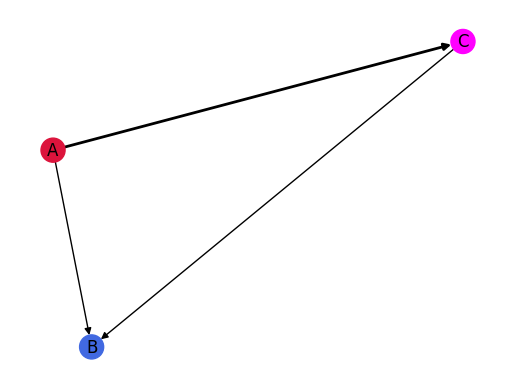

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_edgelist([('A', 'B'), ('A', 'C'), ('C', 'B')], create_using=nx.DiGraph)
nx.set_node_attributes(G, {'A': "crimson", 'B': "royalBlue", 'C': "magenta"}, 'color')
nx.set_edge_attributes(G, {('A','B'): 1, ('A','C'): 2, ('C','B'): 1}, 'weight')

f, ax = plt.subplots()
nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

## Crear grafo desde una matriz de adyacencia

Podemos usar el método [`from_numpy_array`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html#networkx.convert_matrix.from_numpy_array) para crear un grafo a partir de un vector numpy de 2D que representa la matriz de adyacencia.

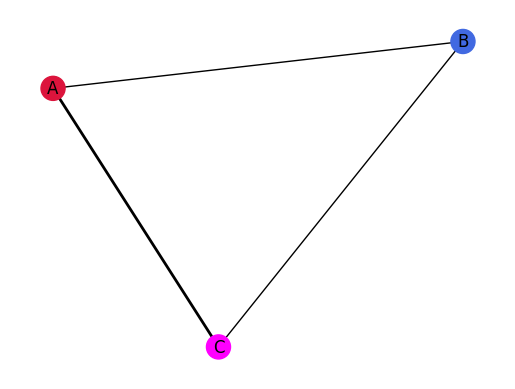

In [58]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [0, 1, 1], 
    [1, 0, 1], 
    [1, 1, 0]]
)

labels = {0: 'A', 1: 'B', 2: 'C'}

G = nx.from_numpy_array(A, create_using=nx.Graph)
nx.set_node_attributes(G, {0: "crimson", 1: "royalBlue", 2: "magenta"}, 'color')
nx.set_edge_attributes(G, {(0,1): 1, (0,2): 2, (1,2): 1}, 'weight')
G = nx.relabel_nodes(G, labels)

f, ax = plt.subplots()
nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

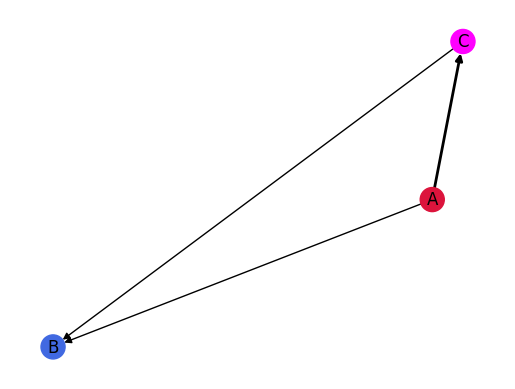

In [59]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [0, 1, 1], 
    [0, 0, 0], 
    [0, 1, 0]]
)

labels = {0: 'A', 1: 'B', 2: 'C'}

G = nx.from_numpy_array(A, create_using=nx.DiGraph)
nx.set_node_attributes(G, {0: "crimson", 1: "royalBlue", 2: "magenta"}, 'color')
nx.set_edge_attributes(G, {(0,1): 1, (0,2): 2, (1,2): 1}, 'weight')
G = nx.relabel_nodes(G, labels)

f, ax = plt.subplots()
nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

## Crear un grafo desde un Dataframe de pandas

Se puede crear un grafo usando un dataframe de pandas. El dataframe debe contener una arista por fila y al menos dos columnas que indiquen el nodo de origen y el nodo de destino de la arista. El resto de columnas del dataframe se pueden usar como atributos de la arista.

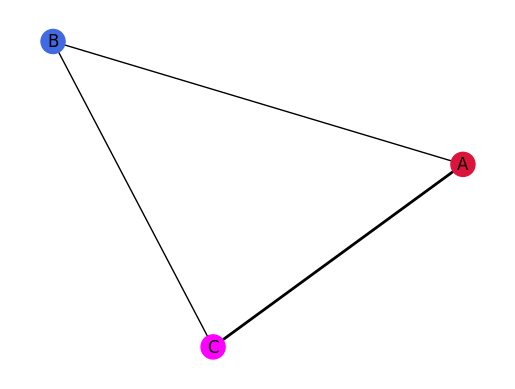

In [61]:
import pandas as pd

df = pd.DataFrame.from_records([
    {'source': 'A', 'target': 'B', 'weight': 1},
    {'source': 'A', 'target': 'C', 'weight': 2},
    {'source': 'C', 'target': 'B', 'weight': 1}
])

G = nx.from_pandas_edgelist(df, 'source', 'target', ['weight'], create_using=nx.Graph)
nx.set_node_attributes(G, {'A': "crimson", 'B': "royalBlue", 'C': "magenta"}, 'color')

f, ax = plt.subplots()
nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

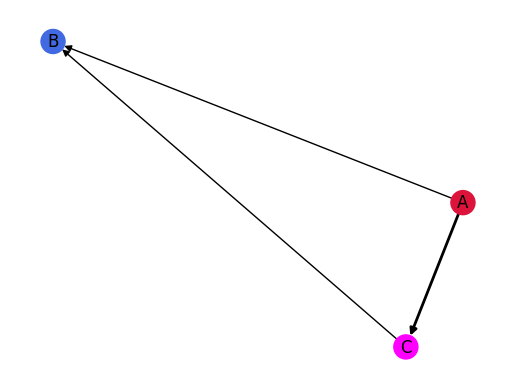

In [62]:
import pandas as pd

df = pd.DataFrame.from_records([
    {'source': 'A', 'target': 'B', 'weight': 1},
    {'source': 'A', 'target': 'C', 'weight': 2},
    {'source': 'C', 'target': 'B', 'weight': 1}
])

G = nx.from_pandas_edgelist(df, 'source', 'target', ['weight'], create_using=nx.DiGraph)
nx.set_node_attributes(G, {'A': "crimson", 'B': "royalBlue", 'C': "magenta"}, 'color')

f, ax = plt.subplots()
nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], width=[r['weight'] for _,_, r in G.edges(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

# Calcular componentes conexas
* Con [`number_connected_components`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.number_connected_components.html#networkx.algorithms.components.number_connected_components) podemos calcular el número de componentes conexas.
* Con [`connected_components`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components) podemos calcular las componentes conexas en sí. En grafos dirigidos hay que usar `strongly_connected_components` o `weakly_connected_components` según se quiera.
 

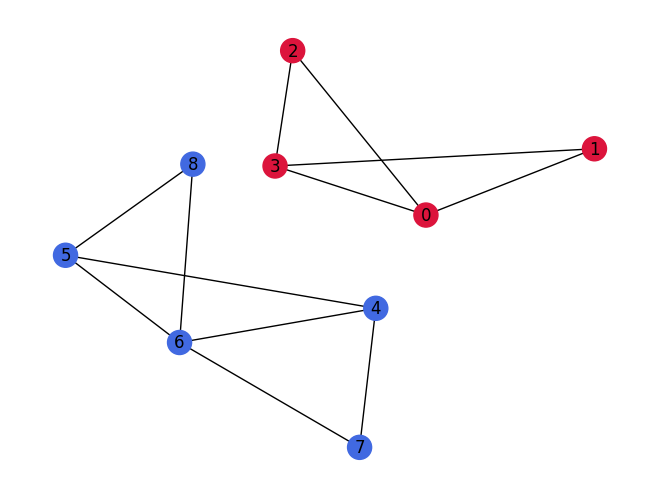

In [78]:
import networkx as nx

G = nx.from_edgelist([
    (0,1),
    (0,2),
    (0,3),
    (1,3),
    (2,3),
    (4,5),
    (4,6),
    (4,7),
    (5,8),
    (5,6),
    (6,7),
    (6,8)
], create_using=nx.Graph)
for n in G.nodes:
    G.nodes[n]['color'] = 'crimson' if n < 4 else 'royalBlue'

nx.draw_kamada_kawai(G, node_color=[r["color"] for _,r in G.nodes(data=True)], with_labels=True)

## Contar las componentes y listar sus miembros

In [75]:
print(f"Number of connected components: {nx.number_connected_components(G)}")

cc = list(nx.connected_components(G))
for i,nodes in enumerate(cc):
    print(f"Connected component {i}: {nodes}")


Number of connected components: 2
Connected component 0: {0, 1, 2, 3}
Connected component 1: {4, 5, 6, 7, 8}


## Quedarse con la componente conexa más grande

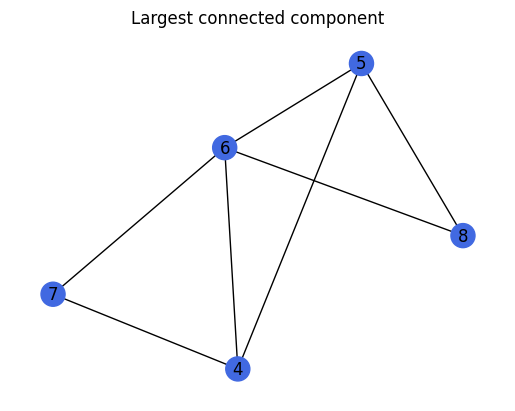

In [77]:
import matplotlib.pyplot as plt

largest_cc = max(cc, key=len)
G_cc = G.subgraph(largest_cc).copy()

f, ax = plt.subplots()
nx.draw_kamada_kawai(G_cc, node_color=[r["color"] for _,r in G_cc.nodes(data=True)], with_labels=True, ax=ax)
ax.set_title("Largest connected component")
plt.show()

## Weak vs Strong

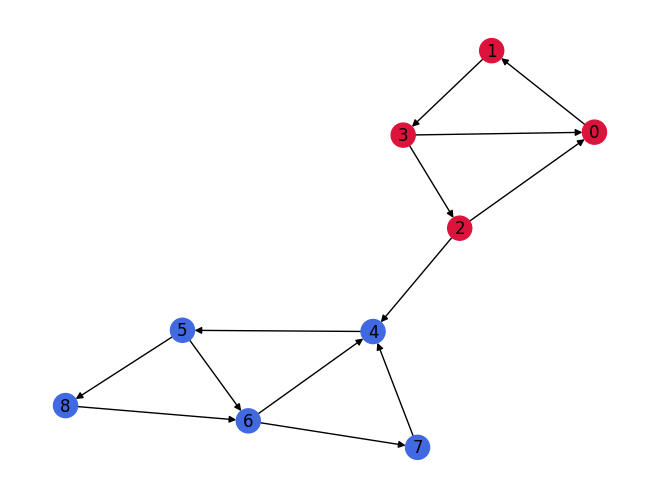

In [88]:
import networkx as nx

G = nx.from_edgelist([
    (0,1),
    (1,3),
    (3,0),
    (3,2),
    (2,0),
    (2,4),
    (4,5),
    (5,6),
    (5,8),
    (6,4),
    (6,7),
    (7,4),
    (8,6)
], create_using=nx.DiGraph)
for n in G.nodes:
    G.nodes[n]['color'] = 'crimson' if n < 4 else 'royalBlue'

nx.draw_kamada_kawai(G, node_color=[r["color"] for _,r in G.nodes(data=True)], with_labels=True)

In [90]:
print(f"Number of weakly connected components: {nx.number_weakly_connected_components(G)}")
print(f"Number of strongly connected components: {nx.number_strongly_connected_components(G)}")
scc = nx.strongly_connected_components(G)
for i,nodes in enumerate(scc):
    print(f"Strongly connected component {i}: {nodes}")

Number of weakly connected components: 1
Number of strongly connected components: 2
Strongly connected component 0: {4, 5, 6, 7, 8}
Strongly connected component 1: {0, 1, 2, 3}


# Grado de los nodos

Para calcular el grado de cada nodo usamos el método [`degree`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html)

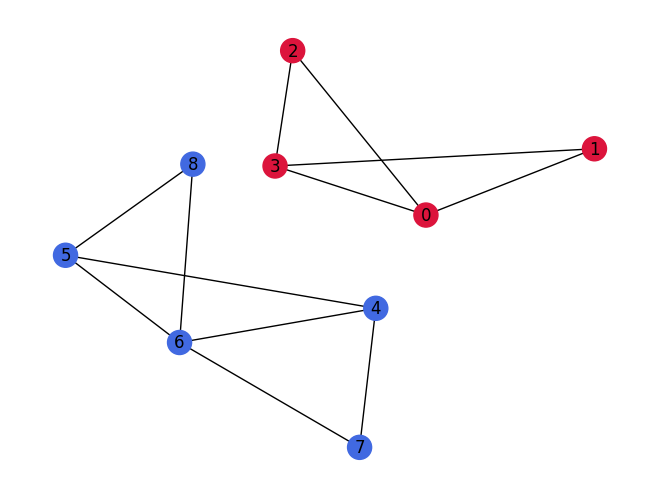

In [99]:
import networkx as nx

G = nx.from_edgelist([
    (0,1),
    (0,2),
    (0,3),
    (1,3),
    (2,3),
    (4,5),
    (4,6),
    (4,7),
    (5,8),
    (5,6),
    (6,7),
    (6,8)
], create_using=nx.Graph)
for n in G.nodes:
    G.nodes[n]['color'] = 'crimson' if n < 4 else 'royalBlue'

nx.draw_kamada_kawai(G, node_color=[r["color"] for _,r in G.nodes(data=True)], with_labels=True)

## Obtengo el degree de cada nodo y elimino aquellos con grado menor o igual que 2

[0, 3, 4, 5, 6]


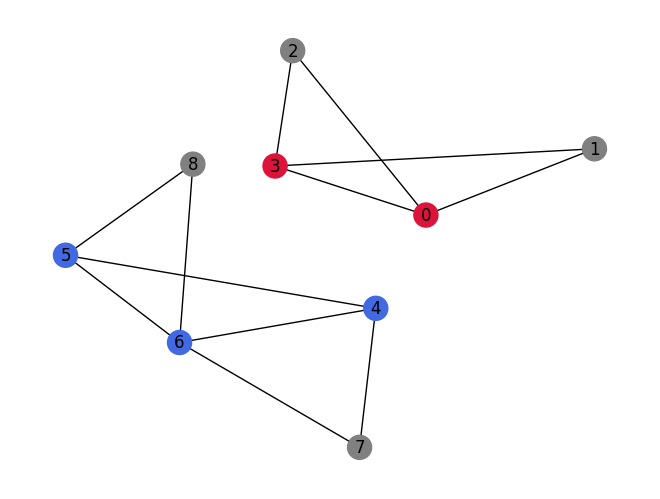

In [100]:
degrees = nx.degree(G)
nodes_to_remove = [n for n,d in degrees if d <= 2]

nx.draw_kamada_kawai(G, node_color=[r["color"] if n not in nodes_to_remove else 'gray' for n,r in G.nodes(data=True)], with_labels=True)

G.remove_nodes_from(nodes_to_remove)
print(G.nodes())

# Proyecciones Bi partidas

Networkx tiene varias [proyecciones](https://networkx.org/documentation/stable/reference/algorithms/bipartite.html#module-networkx.algorithms.bipartite.projection) posible en grafo bi-partidos.

* Se puede hacer la proyección sin peso, es decir todas las aristas son iguales, o con peso, es decir cada arista tendrá un peso según la métrica elegida (número de vecinos, overlap entre los vecinos ... etc).
* Para pintar un grafo bipartido debemos usar [`bipartite_layout`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.bipartite_layout.html).

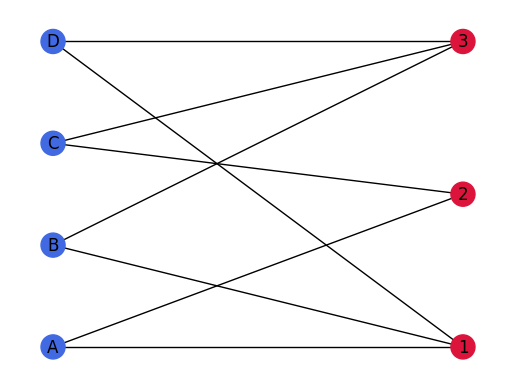

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_edgelist([
    ('A', 1),
    ('A', 2),
    ('B', 1),
    ('B', 3),
    ('C', 2),
    ('C', 3),
    ('D', 1),
    ('D', 3)
], create_using=nx.Graph)
nx.set_node_attributes(G, {'A': "royalBlue", 'B': "royalBlue", 'C': "royalBlue", 'D': "royalBlue", 1: "crimson", 2: "crimson", 3: "crimson"}, 'color')

f, ax = plt.subplots()
pos = nx.bipartite_layout(G, nodes=['A', 'B', 'C', 'D'])
nx.draw_networkx(G, pos, node_color=[r["color"] for _,r in G.nodes(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

## Proyección en el conjunto azul

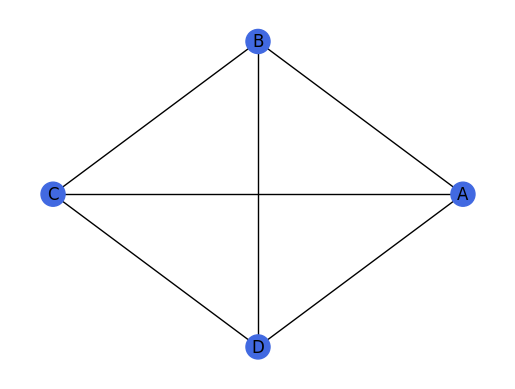

In [103]:
G_blue = nx.bipartite.projected_graph(G, nodes=['A', 'B', 'C', 'D'])

f, ax = plt.subplots()
nx.draw_kamada_kawai(G_blue, node_color=[r["color"] for _,r in G_blue.nodes(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

## Proyección en conjunto rojo

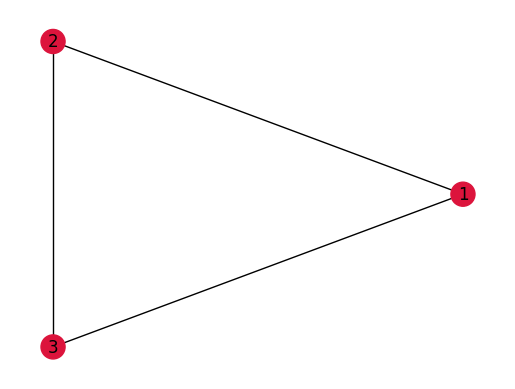

In [105]:
G_red = nx.bipartite.projected_graph(G, nodes=[1,2,3])

f, ax = plt.subplots()
nx.draw_kamada_kawai(G_red, node_color=[r["color"] for _,r in G_red.nodes(data=True)], with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

## Proyección con pesos

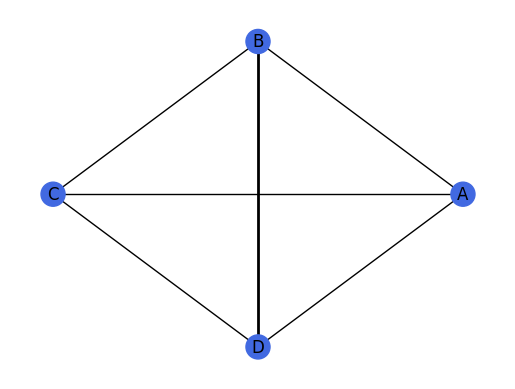

In [108]:
G_blue = nx.bipartite.weighted_projected_graph(G, nodes=['A', 'B', 'C', 'D'])

f, ax = plt.subplots()
nx.draw_kamada_kawai(G_blue, node_color=[r["color"] for _,r in G_blue.nodes(data=True)], width=[r["weight"] for _,_,r in G_blue.edges(data=True)] ,with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()

# Ego network

Podemos calcular la ego network de un grafo usando [`ego_graph`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html)

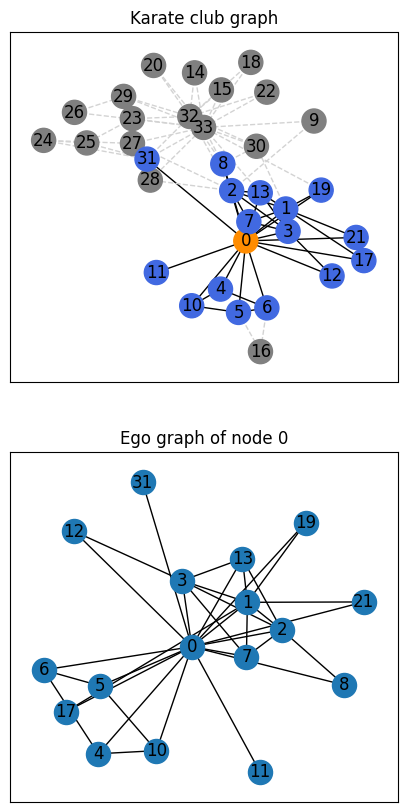

In [118]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
nx.set_node_attributes(G, "gray", "color")
nx.set_edge_attributes(G, "dashed", "style")
nx.set_edge_attributes(G, "lightgray", "color")

G_ego_0 = nx.ego_graph(G, 0, radius=1)
for n in G_ego_0.nodes:
    G.nodes[n]['color'] = 'royalBlue'

for s,t in G_ego_0.edges:
    G.edges[s,t]['style'] = 'solid'
    G.edges[s,t]['color'] = 'k'

G.nodes[0]['color'] = 'darkorange'

f, ax = plt.subplots(2, figsize=(5,10))
nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], style=[r["style"] for _,_,r in G.edges(data=True)], edge_color=[r["color"] for _,_,r in G.edges(data=True)], with_labels=True, ax=ax[0])
nx.draw_networkx(G_ego_0, with_labels=True, ax=ax[1])
ax[0].set_title("Karate club graph")
ax[1].set_title("Ego graph of node 0")
plt.show()


In [122]:
def draw_ego(G, N, r, ax):
    nx.set_node_attributes(G, "gray", "color")
    nx.set_edge_attributes(G, "dashed", "style")
    nx.set_edge_attributes(G, "lightgray", "color")

    G_ego = nx.ego_graph(G, N, radius=r)
    for n in G_ego.nodes:
        G.nodes[n]['color'] = 'royalBlue'

    for s,t in G_ego.edges:
        G.edges[s,t]['style'] = 'solid'
        G.edges[s,t]['color'] = 'k'

    G.nodes[N]['color'] = 'darkorange'

    nx.draw_networkx(G, node_color=[r["color"] for _,r in G.nodes(data=True)], style=[r["style"] for _,_,r in G.edges(data=True)], edge_color=[r["color"] for _,_,r in G.edges(data=True)], with_labels=True, ax=ax)
    ax.set_title(f"Ego network of node {N}, radius {r}")
    

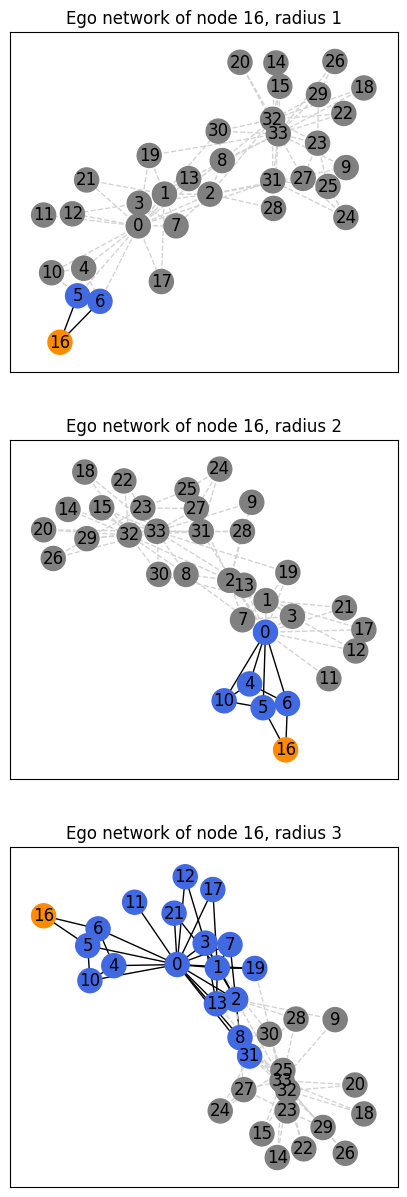

In [123]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

f, ax = plt.subplots(3, figsize=(5,15)) 
draw_ego(G, 16, 1, ax[0])
draw_ego(G, 16, 2, ax[1])
draw_ego(G, 16, 3, ax[2])
plt.show()


# Calcular comunidades
Podemos usar [`louvain_communities`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities) para calcular las comunidades de un grafo.

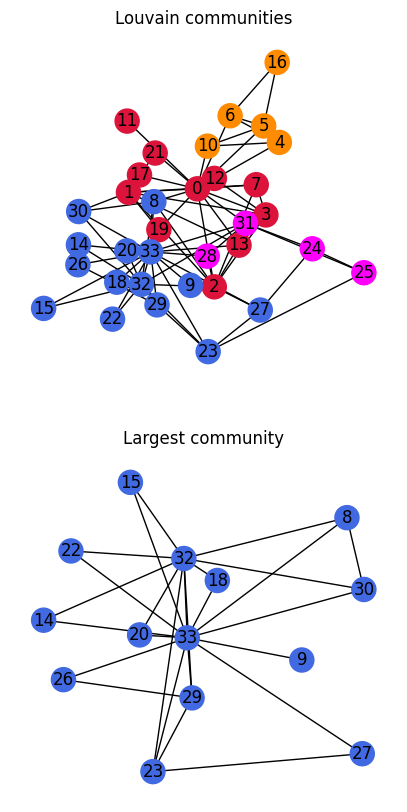

In [128]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
nx.set_node_attributes(G, "gray", "color")

colors = ["crimson", "royalBlue", "darkorange", "magenta"]
coms = nx.community.louvain_communities(G)

for i,com in enumerate(coms):
    for n in com:
        G.nodes[n]['color'] = colors[i]

f, ax = plt.subplots(2, figsize=(5,10))
nx.draw_kamada_kawai(G, node_color=[r["color"] for _,r in G.nodes(data=True)], with_labels=True, ax=ax[0])
G_com = nx.subgraph(G, max(coms, key=len))
nx.draw_kamada_kawai(G_com, node_color=[r["color"] for _,r in G_com.nodes(data=True)], with_labels=True, ax=ax[1])
ax[0].set_title("Louvain communities")
ax[0].set_axis_off()
ax[1].set_title("Largest community")
ax[1].set_axis_off()
plt.show()        


# Calcular pagerank o la importancia de un nodo en la red
* Para grafos **no dirigidos** usamos [`eigenvecor_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality)
* Para grafos **dirigidos** usamos [`pagerank`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)

Top 5 nodes by eigenvector centrality: [33, 0, 2, 32, 1]


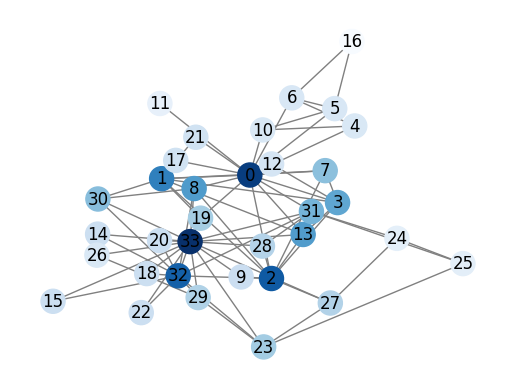

In [137]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
centrality = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, centrality, "centrality")

top_5 = sorted(centrality, key=centrality.get, reverse=True)[:5]
print(f"Top 5 nodes by eigenvector centrality: {top_5}")

f, ax = plt.subplots()
nx.draw_kamada_kawai(G, node_color=[r["centrality"] for _,r in G.nodes(data=True)], edge_color="gray", cmap='Blues', with_labels=True, ax=ax)
ax.set_axis_off()
plt.show()